<a href="https://colab.research.google.com/github/halil67/Human-Pose-Estimation/blob/master/Capstone_Project_4_Student_(Adult_Income_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo.png](attachment:logo.png)

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis and Visualization

In [2]:
df=pd.read_csv("/content/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
median_workclass = df['workclass'].mode().iloc[0]  # modunu alıyoruz, çünkü 'workclass' kategorik bir sütun
print(median_workclass)
df['workclass'] = df['workclass'].replace('?', median_workclass)

median_native = df['native.country'].mode().iloc[0]  # modunu alıyoruz, çünkü 'workclass' kategorik bir sütun
df['native.country'] = df['native.country'].replace('?', median_native)
print(median_native)


Private
United-States


In [5]:
df.shape

(32561, 15)

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#df['income_encoded'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values_count = df[column].value_counts()
    print(f"Unique values and their counts in {column}:\n{unique_values_count}")

Unique values and their counts in workclass:
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Unique values and their counts in education:
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Unique values and their counts in marital.status:
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, d

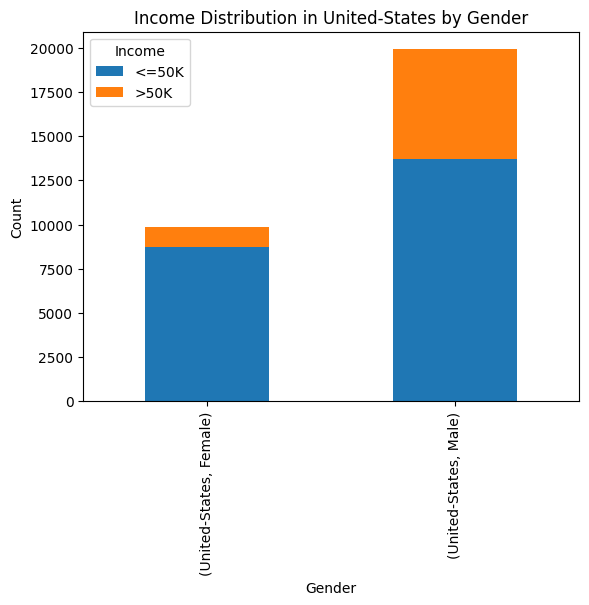

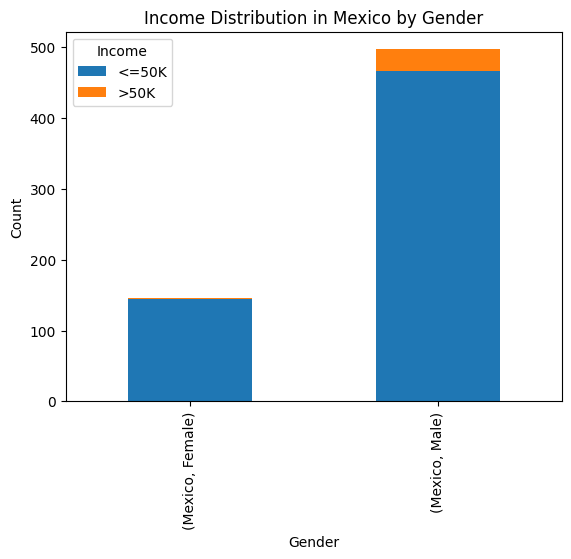

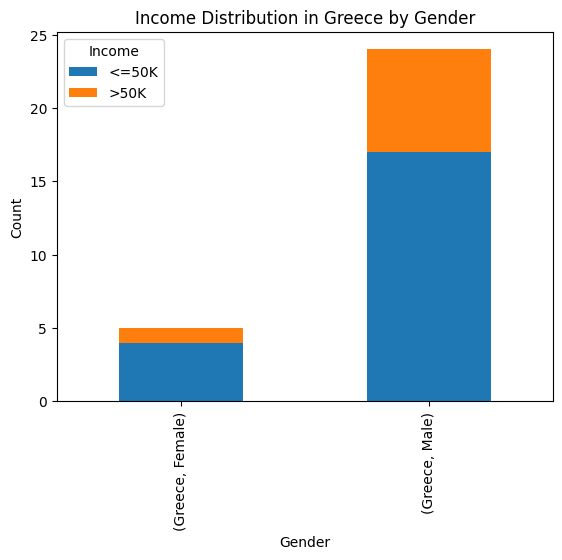

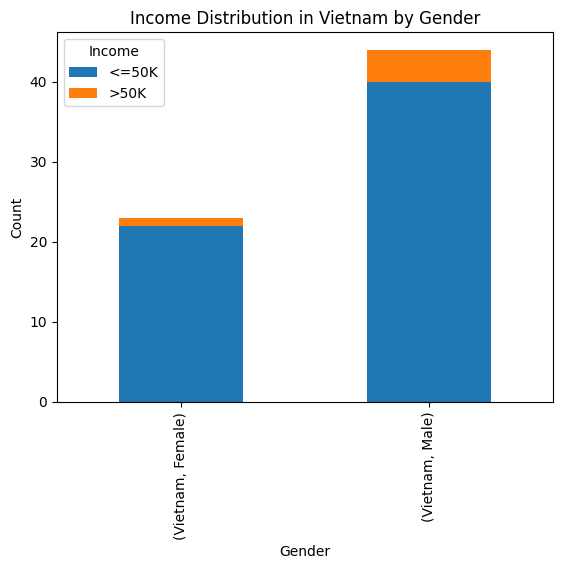

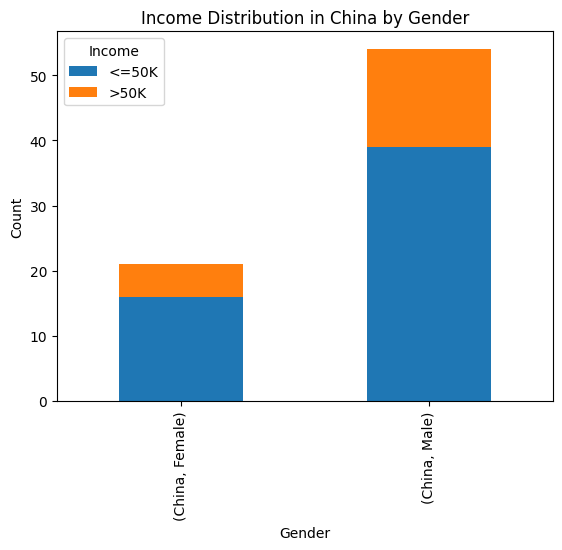

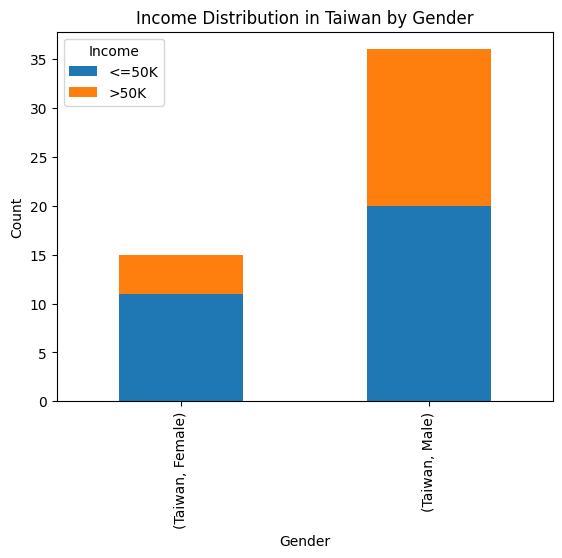

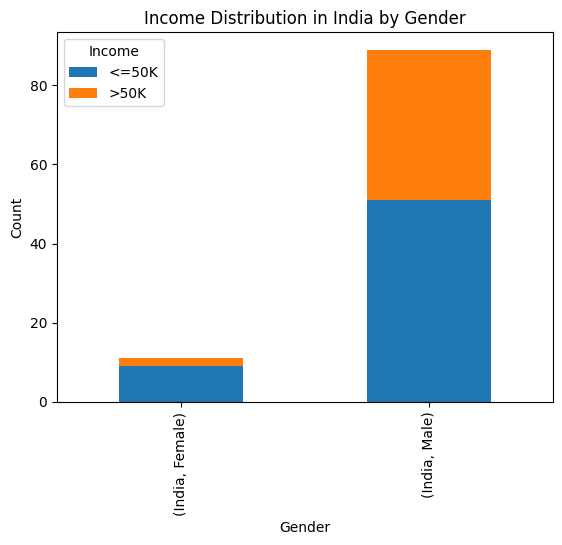

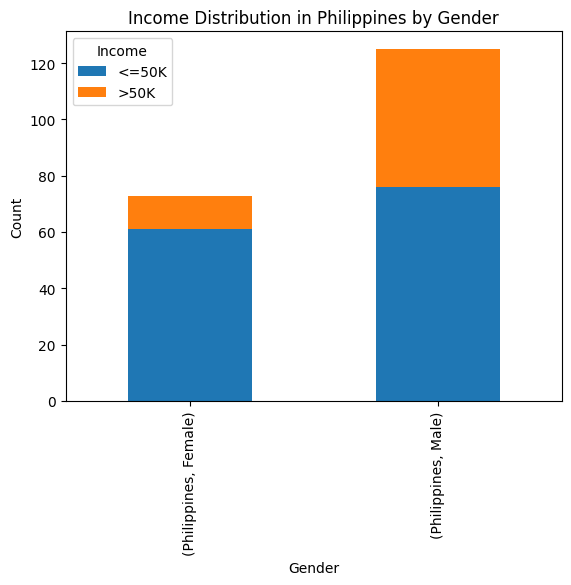

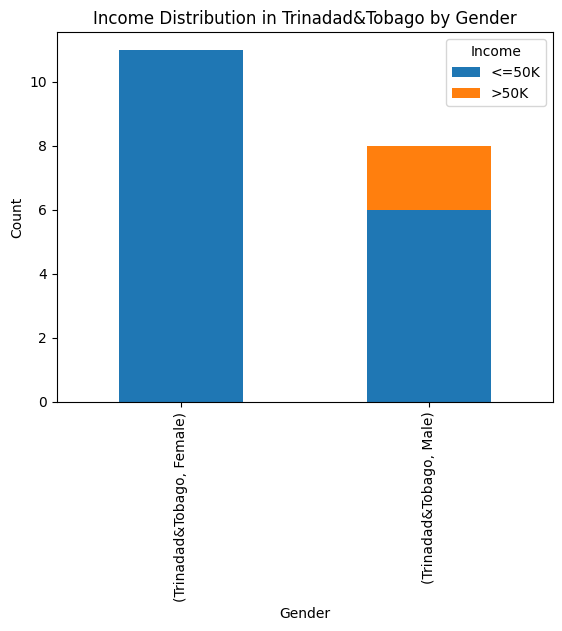

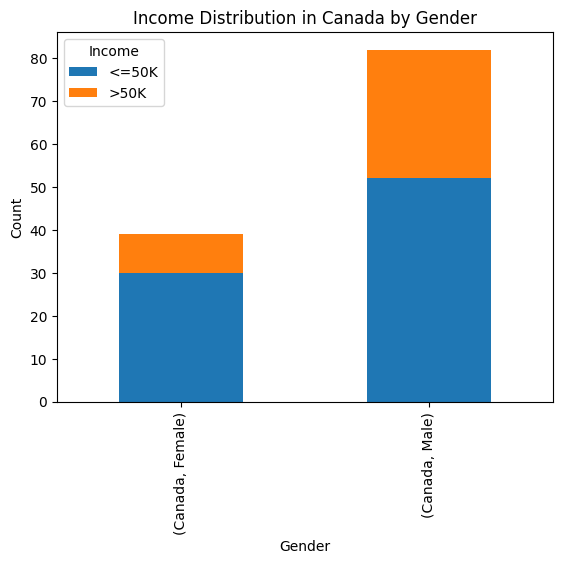

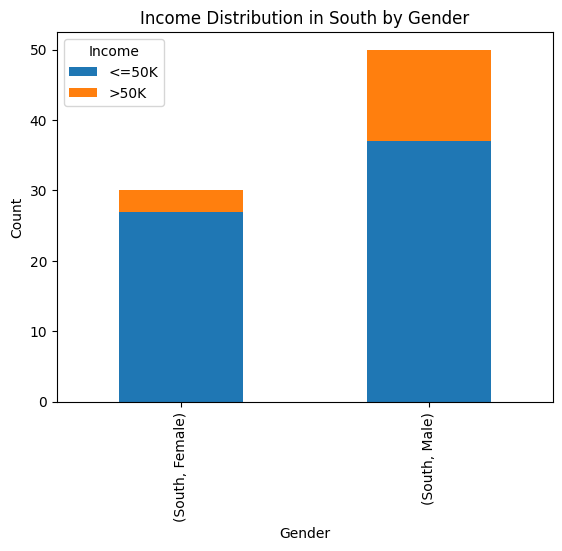

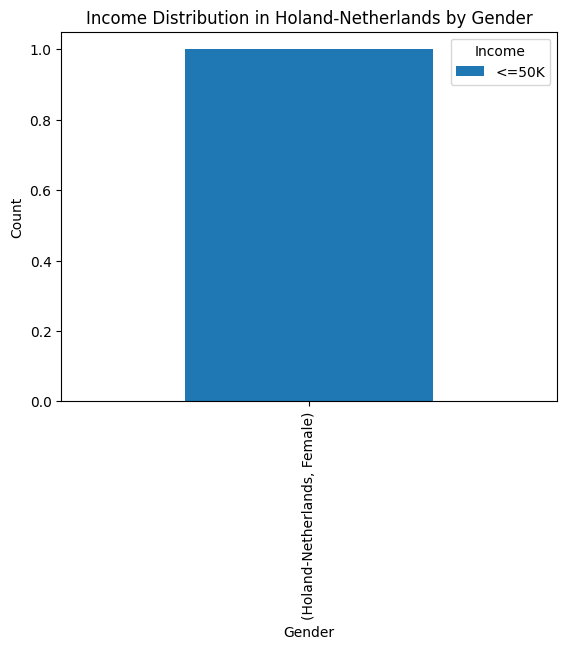

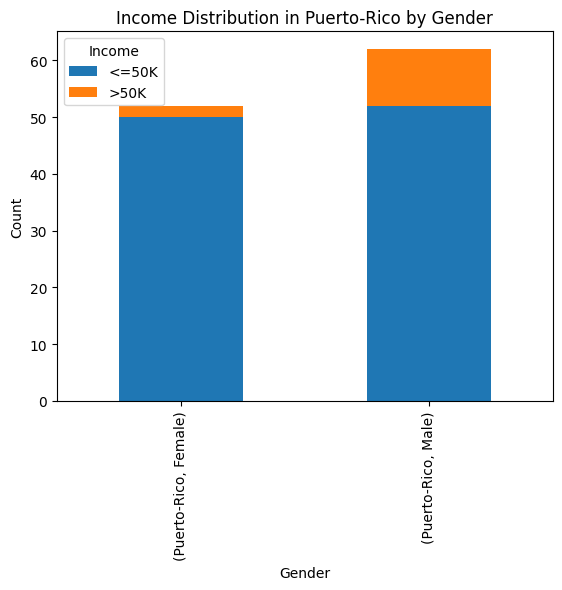

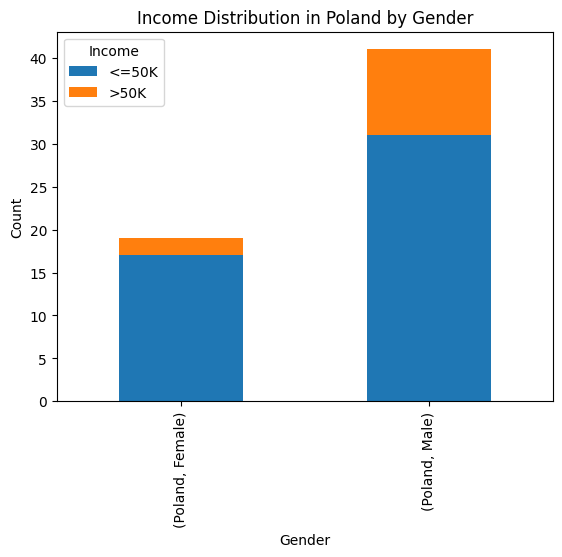

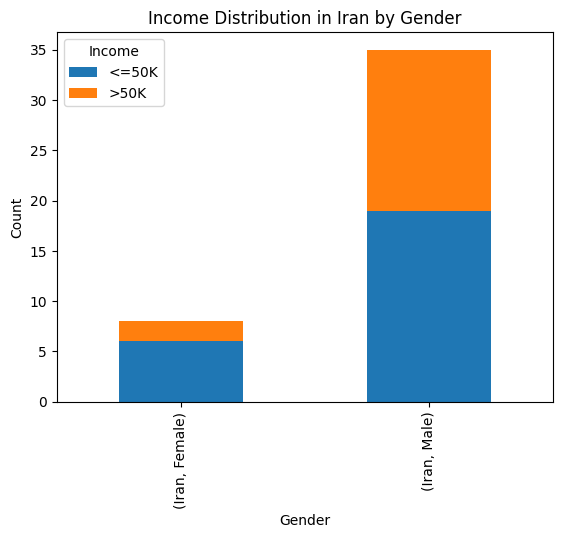

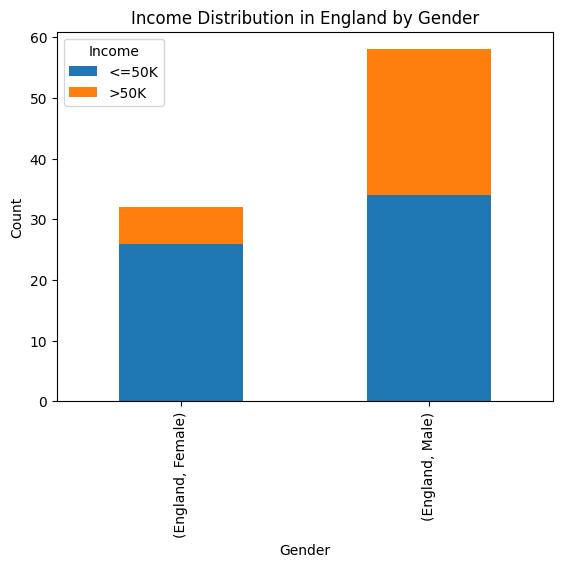

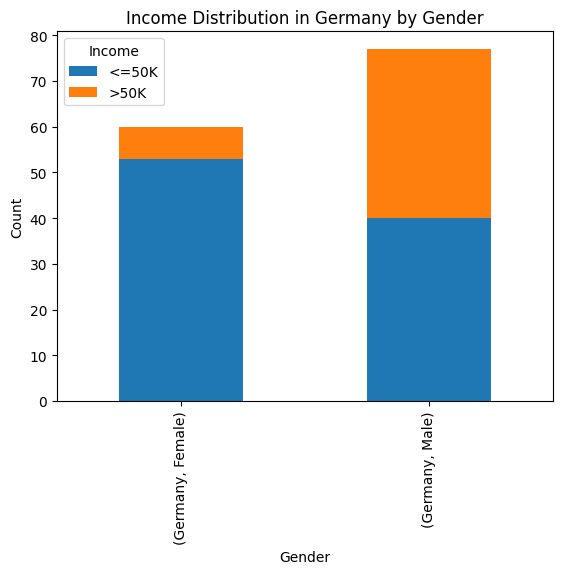

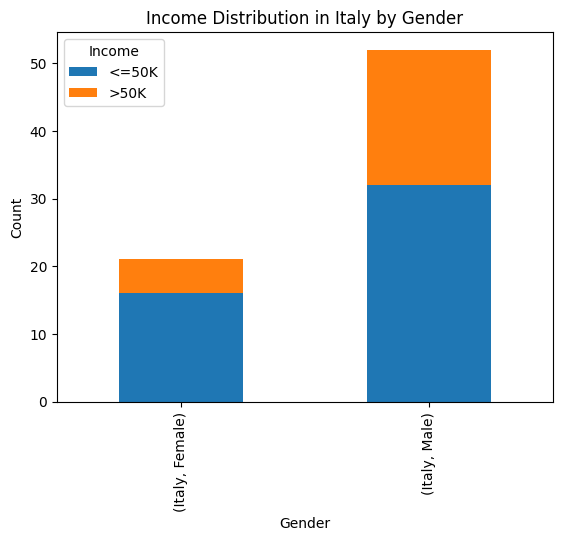

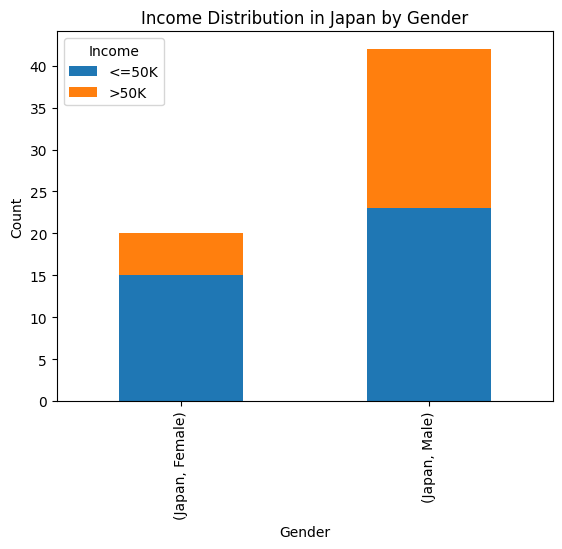

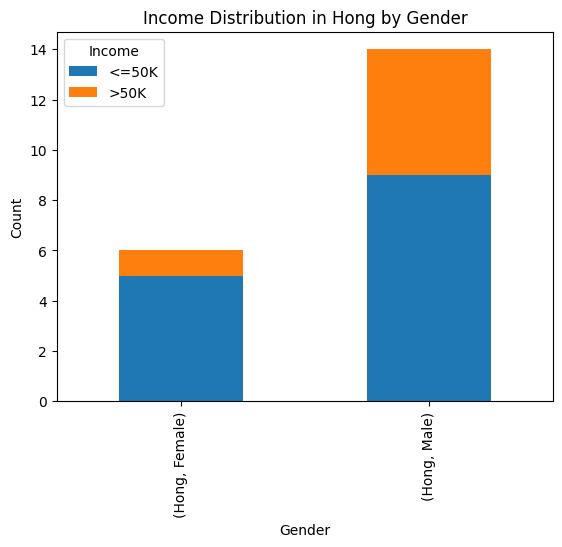

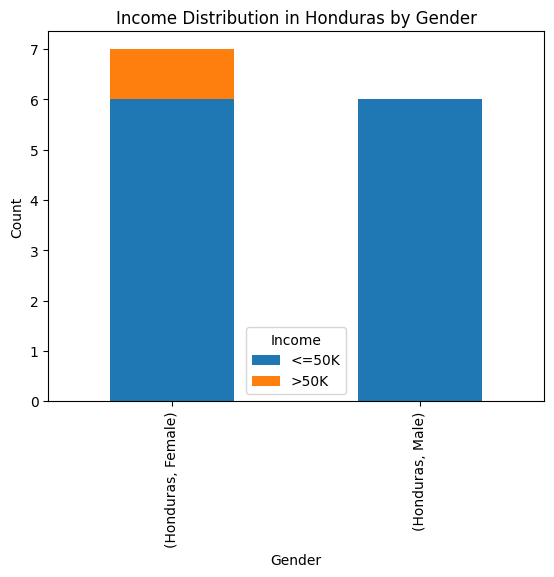

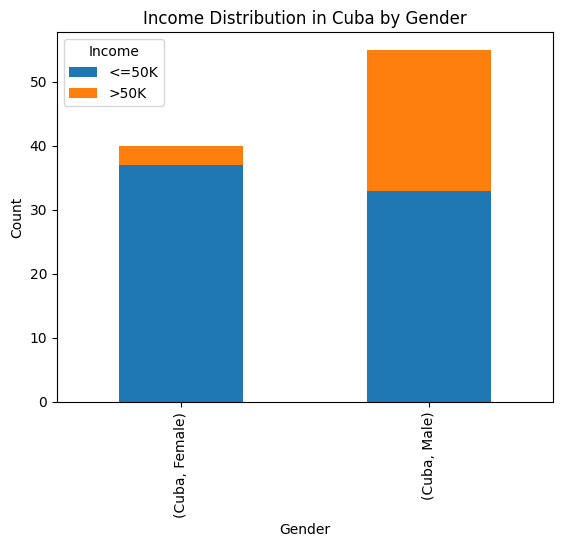

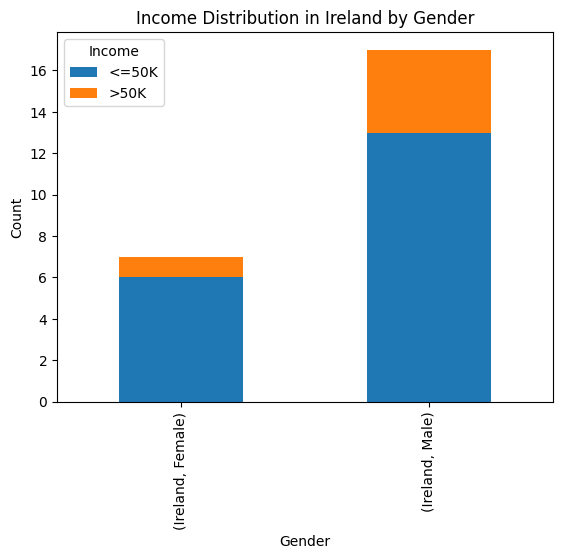

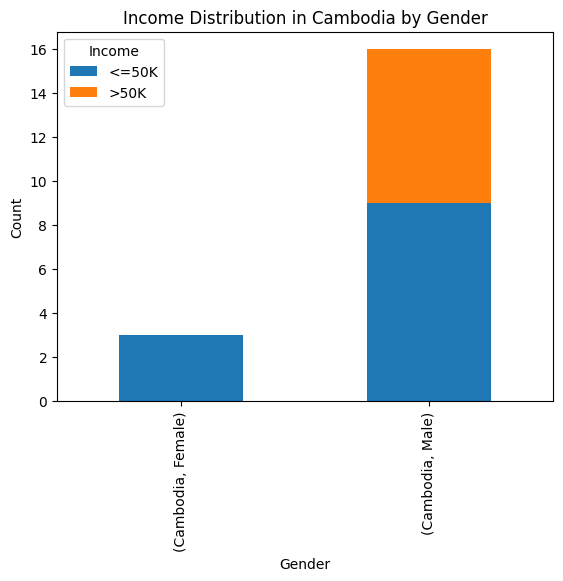

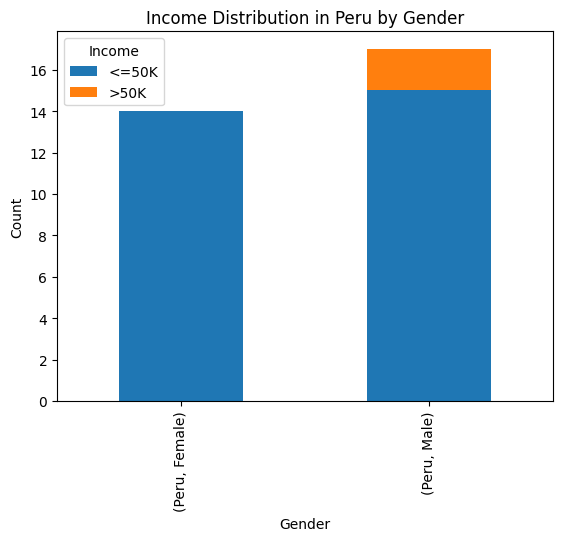

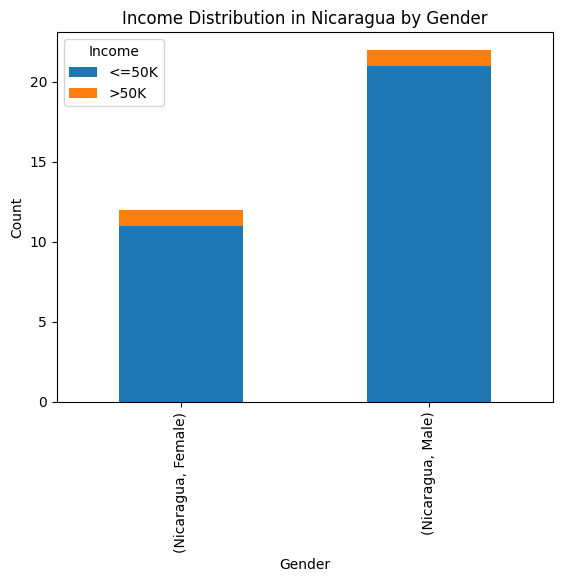

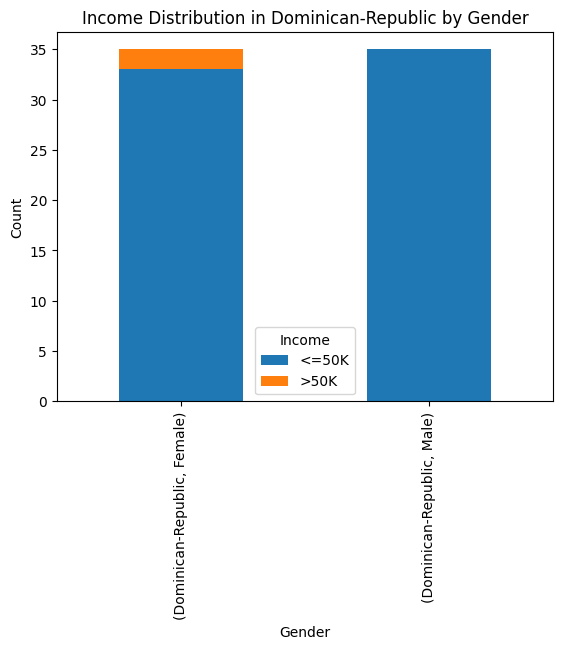

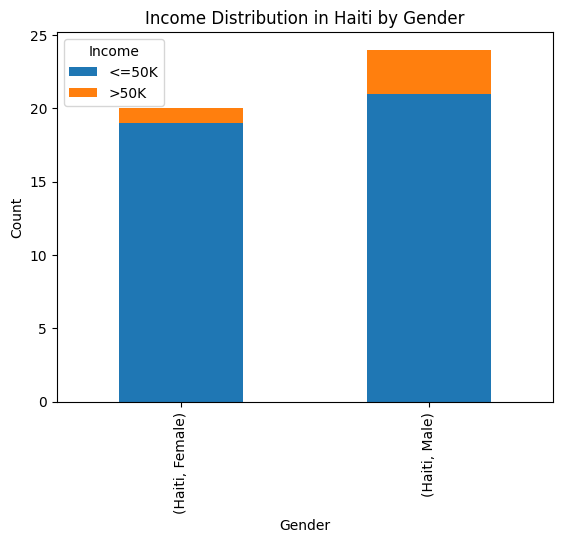

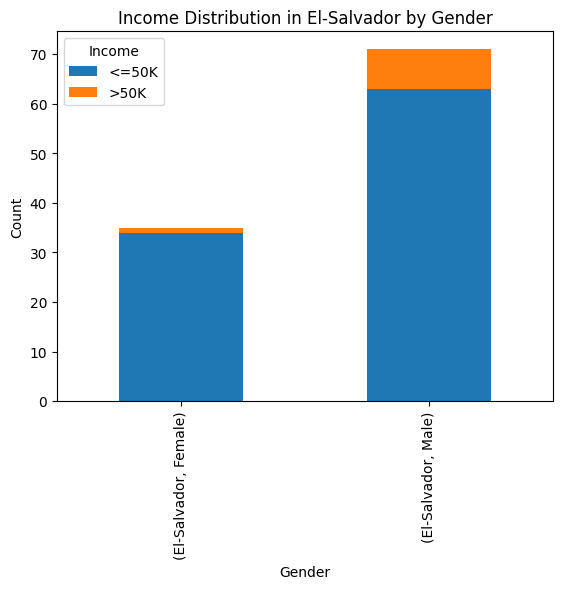

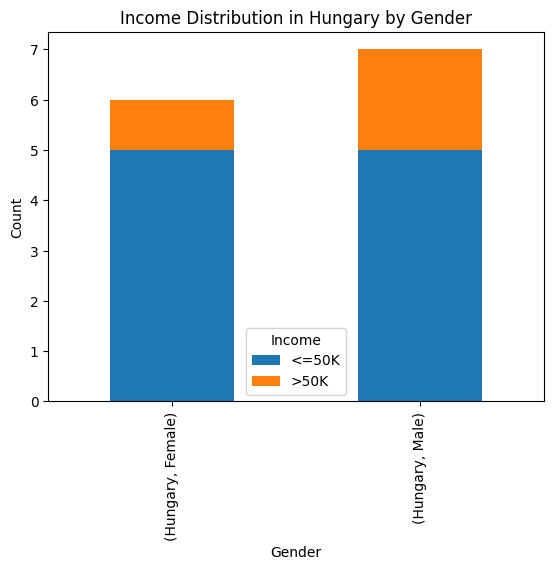

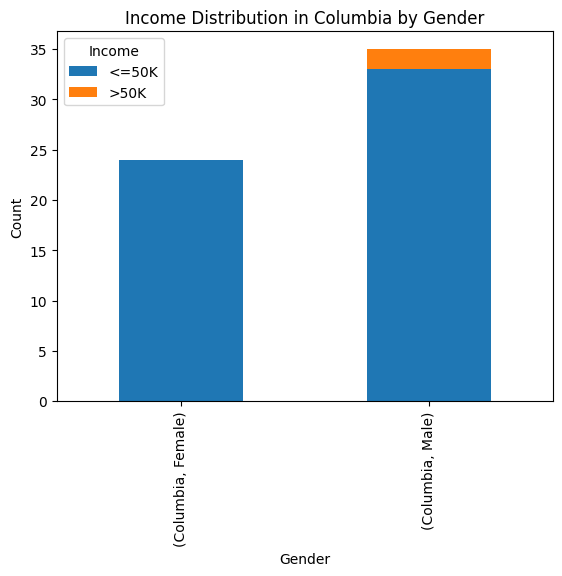

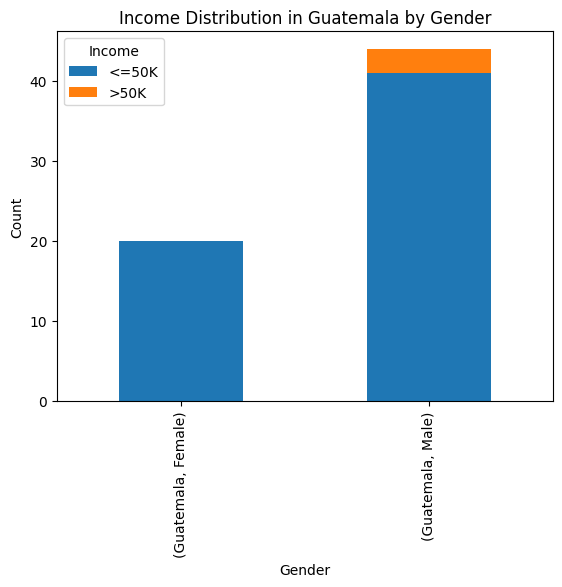

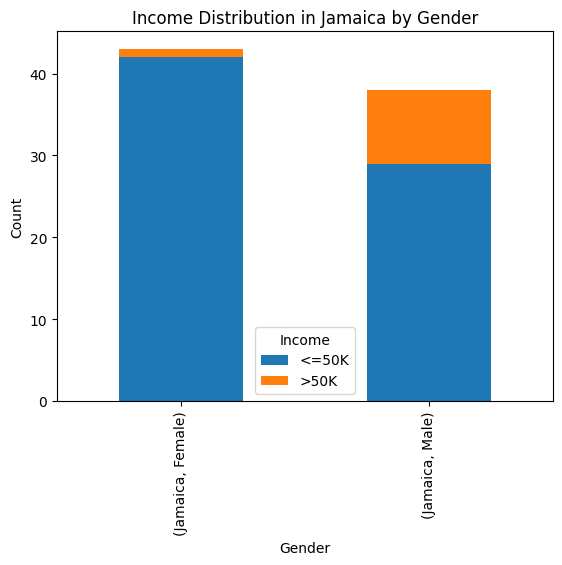

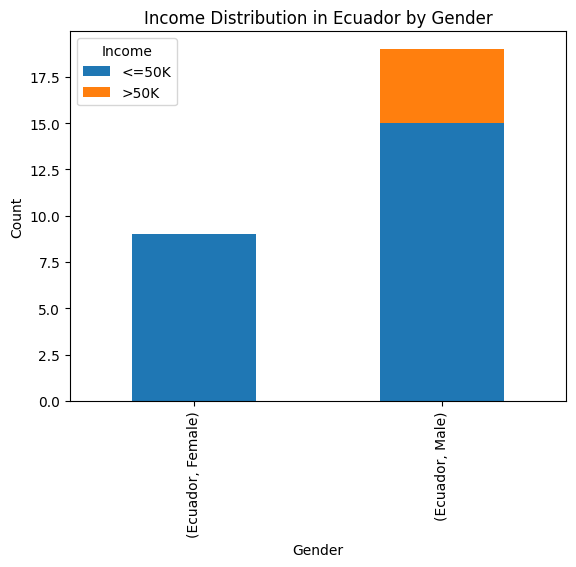

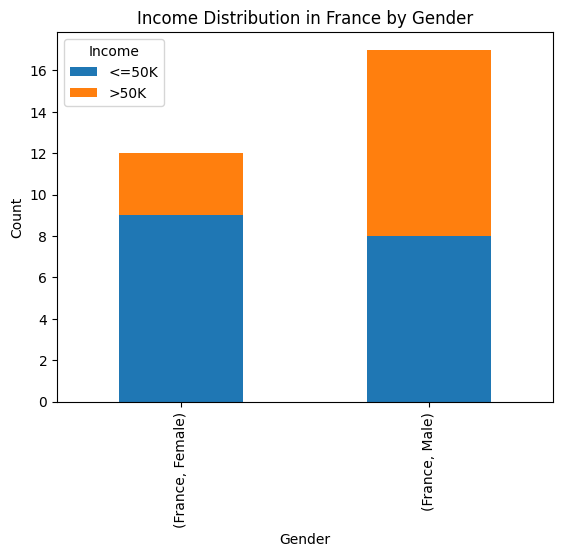

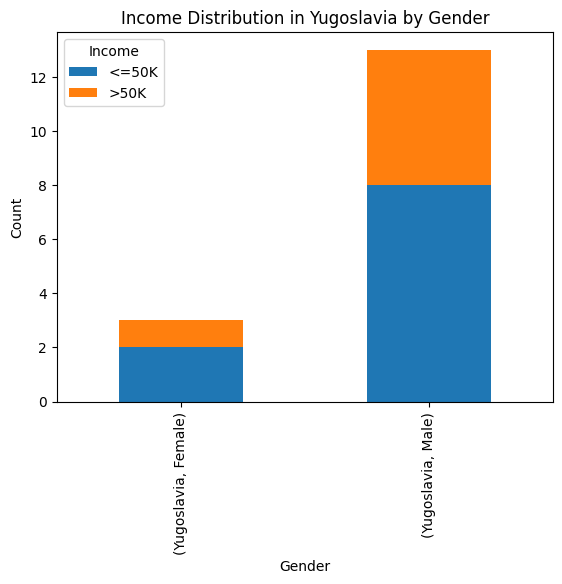

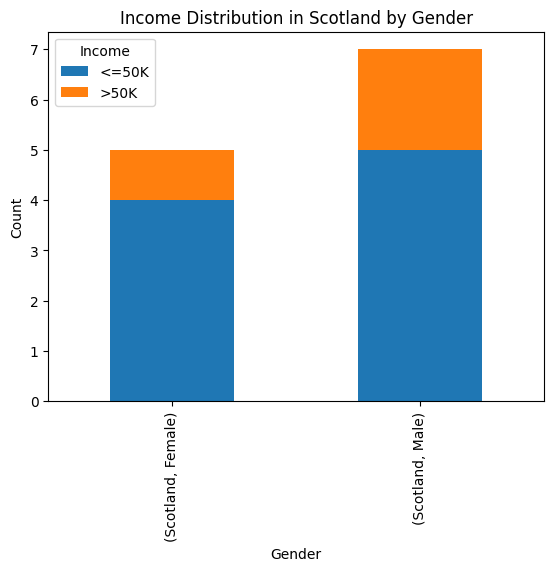

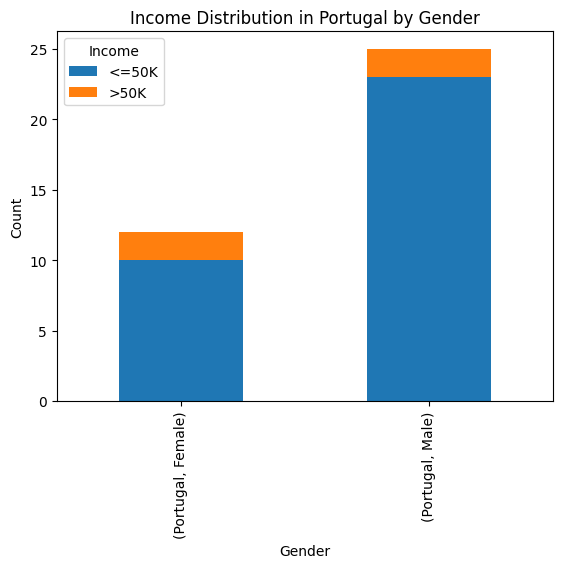

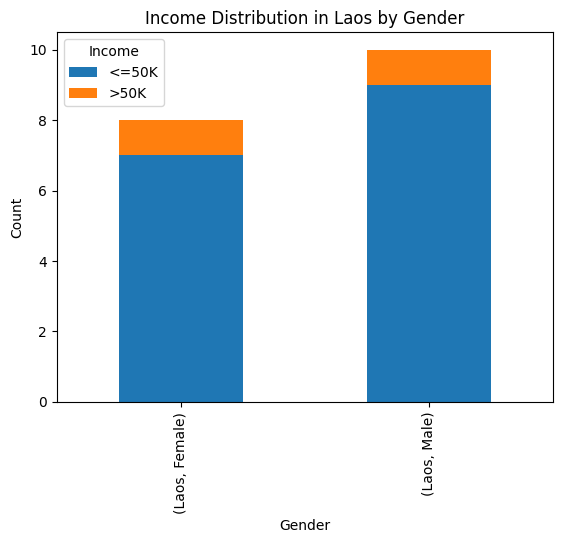

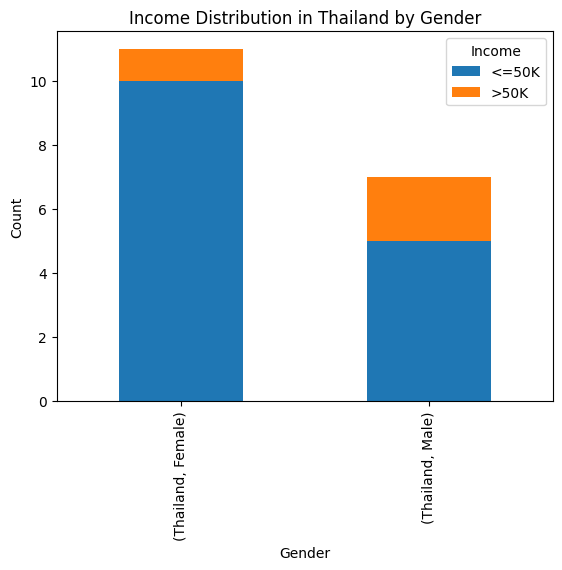

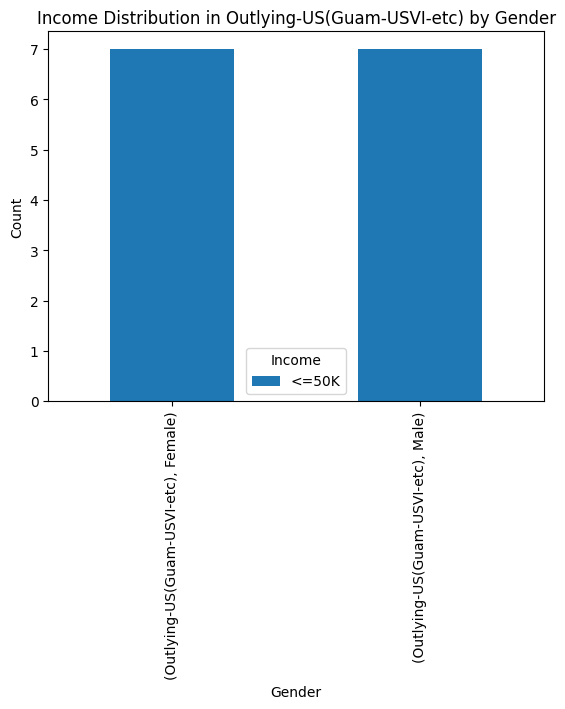

In [10]:
df_country=df["native.country"].unique()
for country in df_country:
    df_canada = df[df['native.country'] == country ]
    result = df_canada.groupby(["native.country", "sex", "income"]).size().reset_index(name='count')

    # Pivot işlemi
    pivot_result = result.pivot_table(index=["native.country", "sex"], columns="income", values="count", fill_value=0)

    # Bar grafiği oluştur
    pivot_result.plot(kind='bar', stacked=True)
    plt.title(f'Income Distribution in {country} by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Income')
    plt.show()

In [ ]:
# Assuming you have a DataFrame named 'df'
result = df.groupby(["native.country", "sex", "income"])["income"].count().reset_index(name='count')
result = result.sort_values(by=["native.country", "sex", "income"], ascending=False)
result

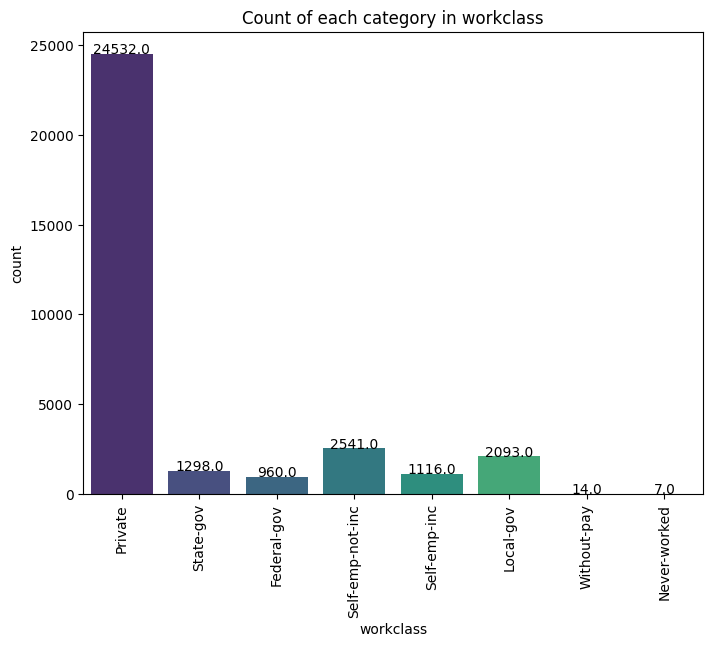

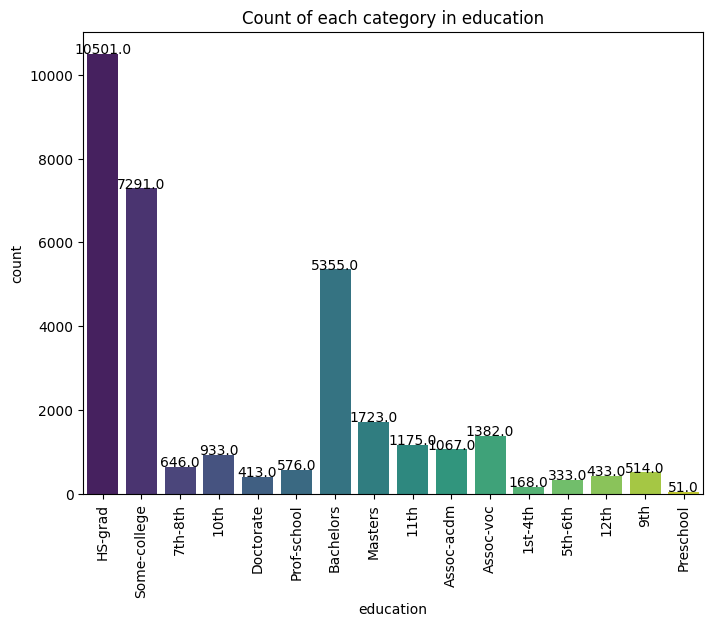

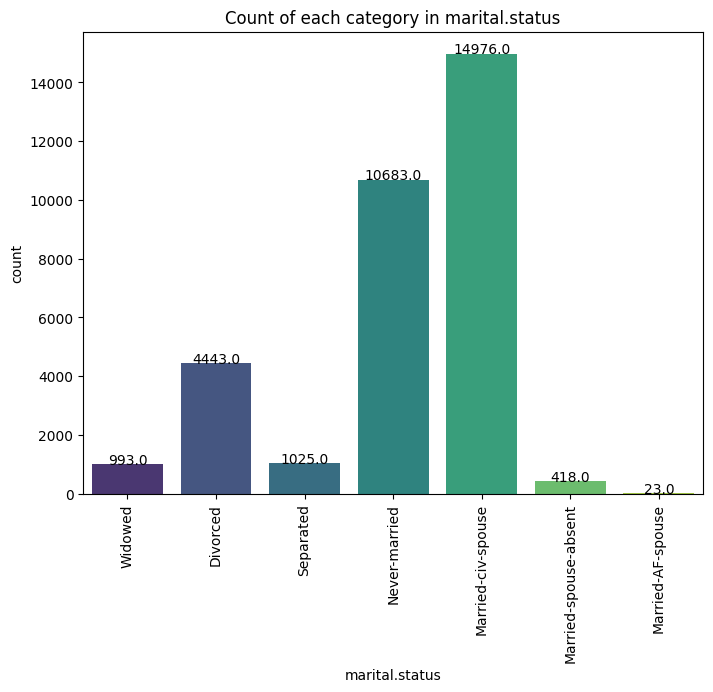

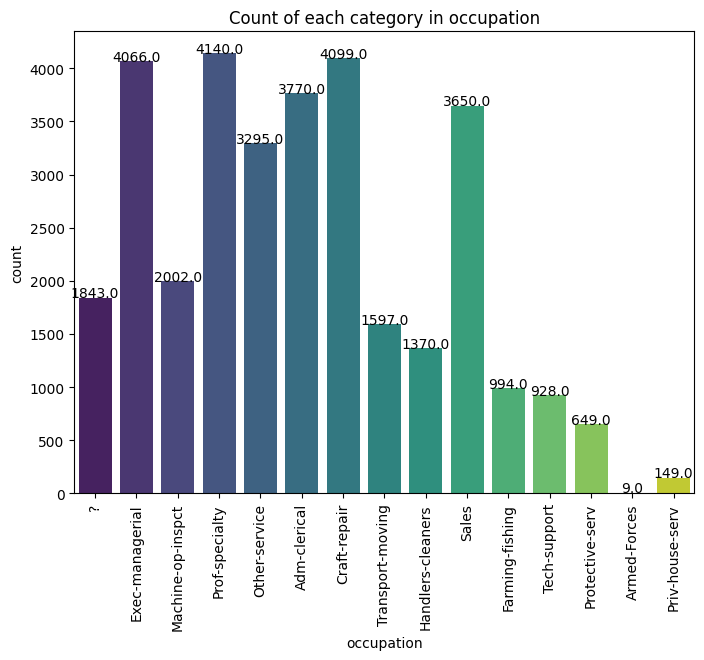

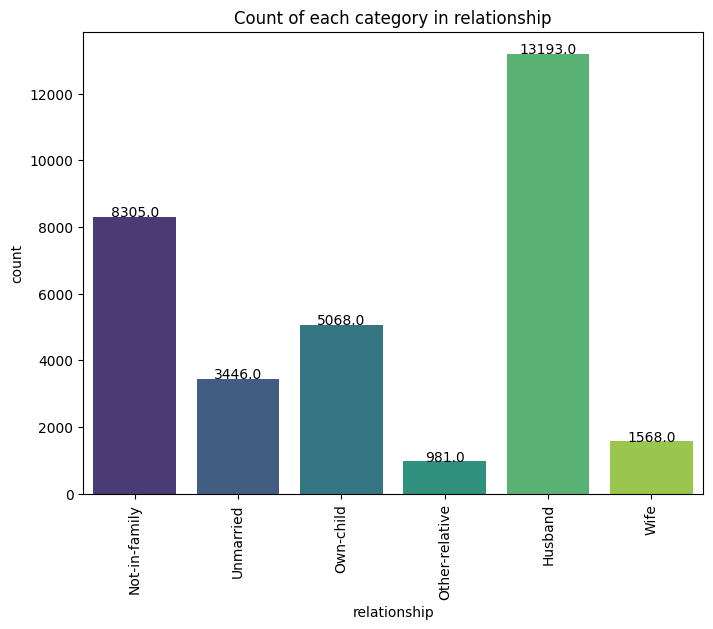

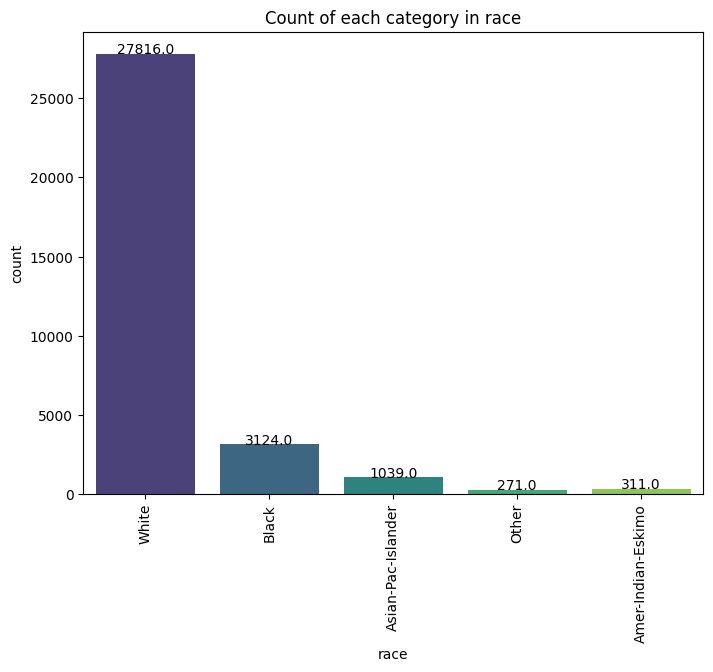

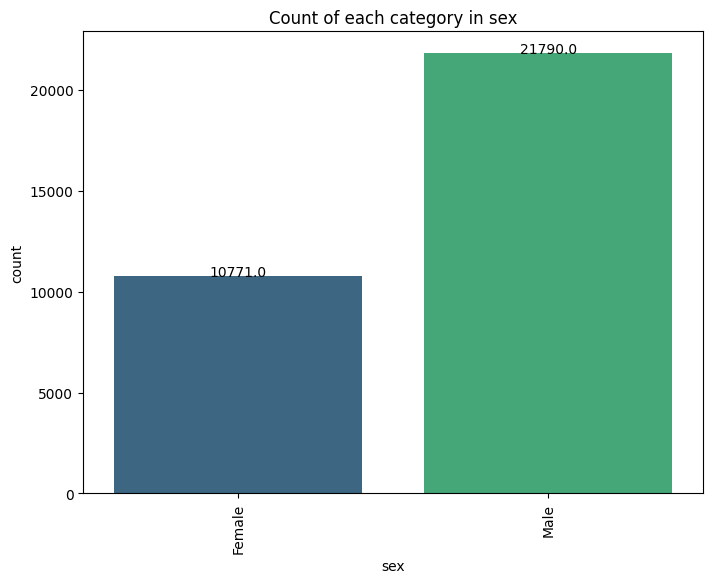

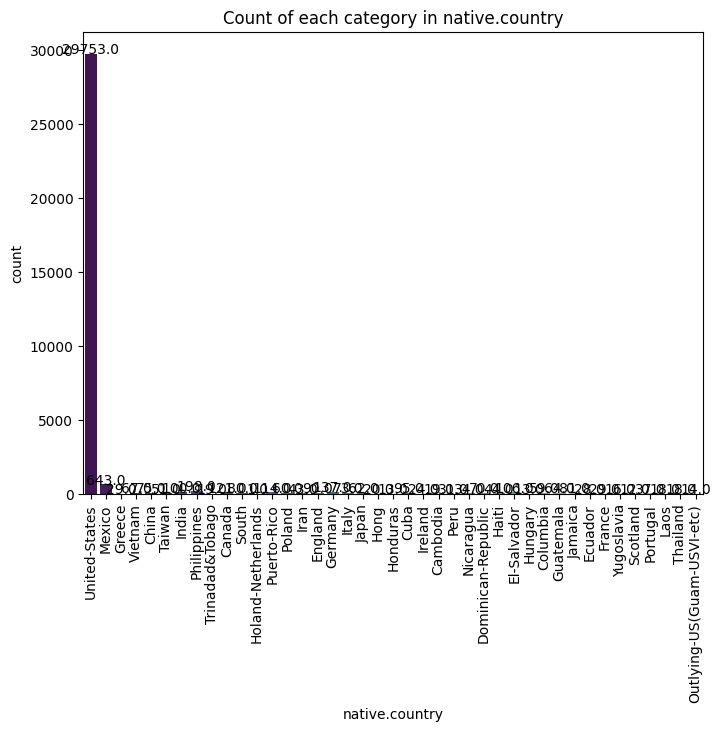

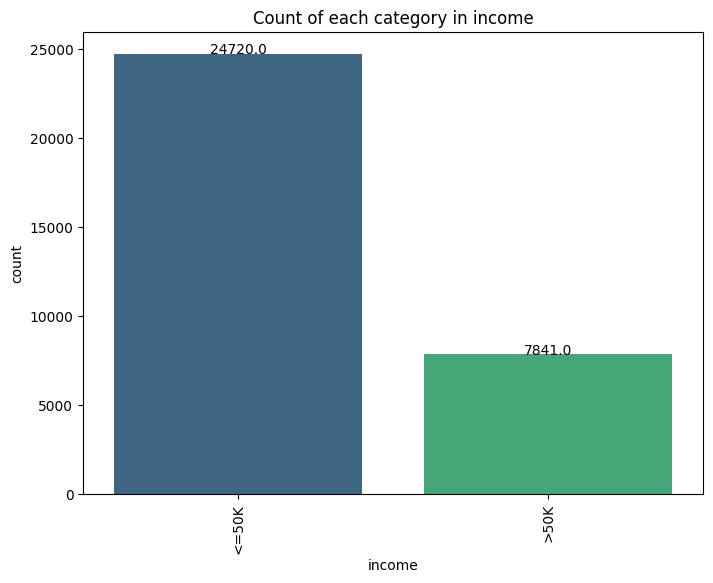

In [12]:
# Kategorik sütunları seçin
categorical_columns = df.select_dtypes(include=['object']).columns

# Her bir kategorik sütun için bar grafiği çizin
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of each category in {column}')

    # Değerleri grafiğe ekle
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

    plt.xticks(rotation=90)  # x eksenindeki etiketleri 90 derece döndür
    plt.show()

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Belirli bir eşik değerinden az kategorik değere sahip sütunları bulun
threshold = 1000
selected_columns = [column for column in categorical_columns if df[column].nunique() < threshold]

# get_dummies fonksiyonunu uygula, drop_first parametresini kullanarak ilk sütunu düşür
df_one_hot = pd.get_dummies(df, columns=selected_columns, drop_first=True)

df_one_hot=df_one_hot.select_dtypes(include=[np.number])


In [15]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


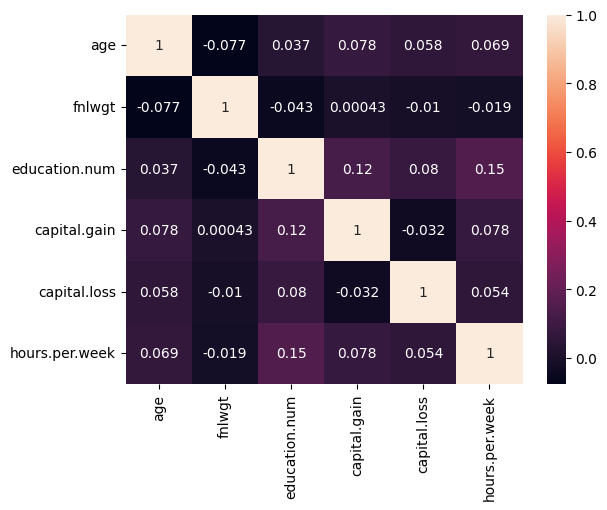

In [16]:
sns.heatmap(numeric_columns.corr(),annot=True);

In [18]:
dfn=pd.concat((numeric_columns,df_one_hot["income_>50K"]),axis=1)


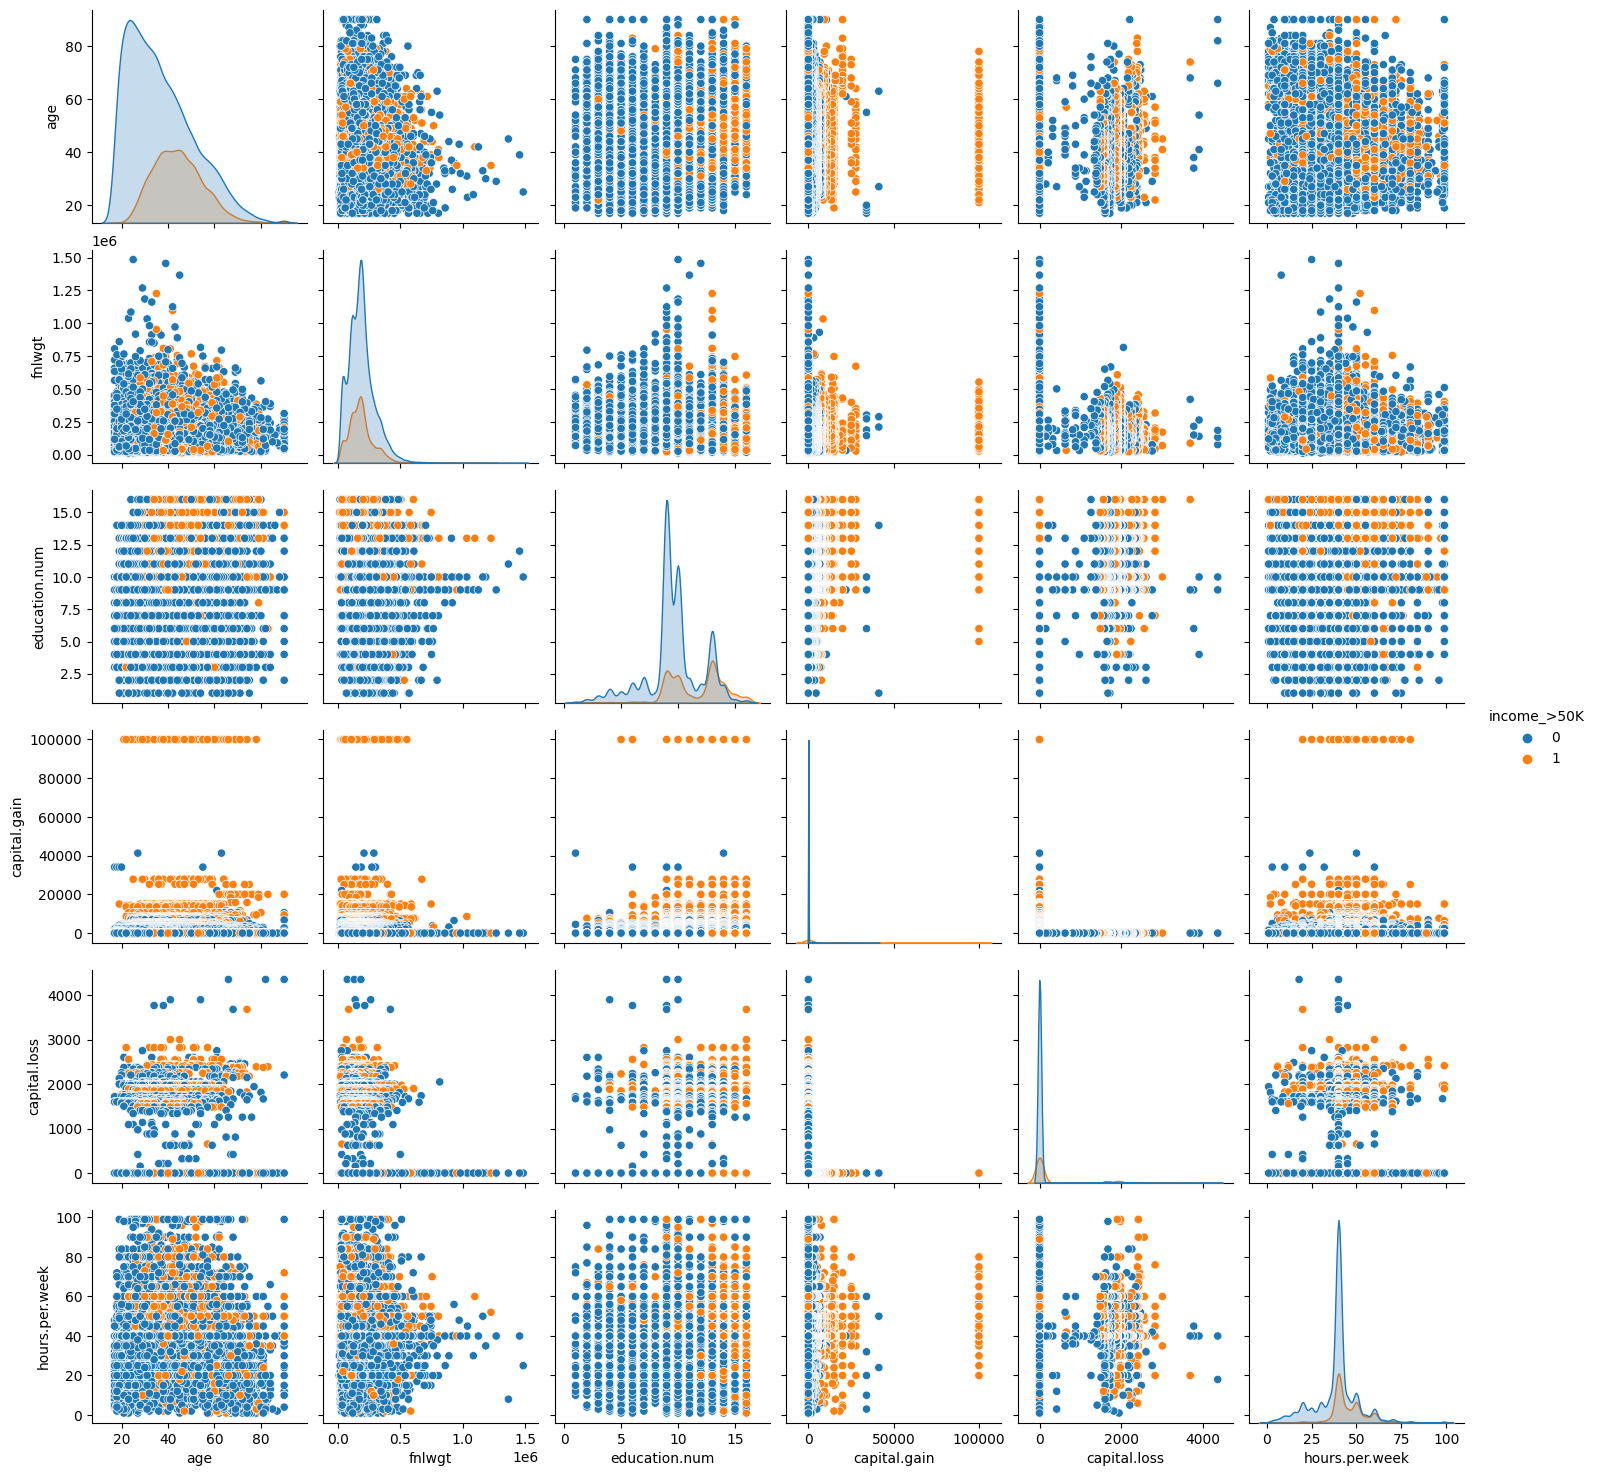

In [ ]:
sns.pairplot(data = dfn, hue = "income_>50K");

boxplot

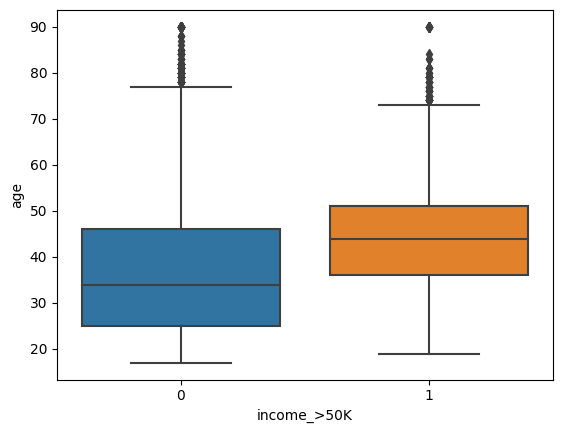

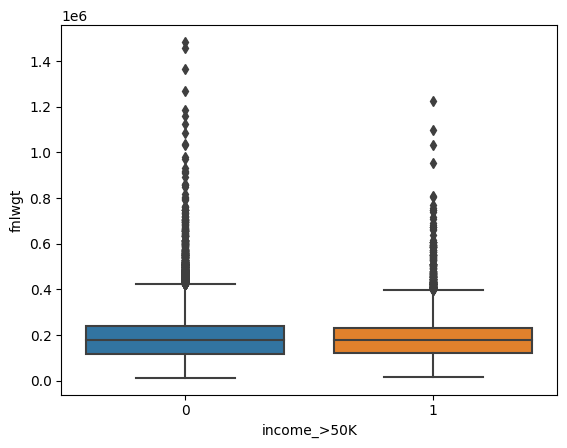

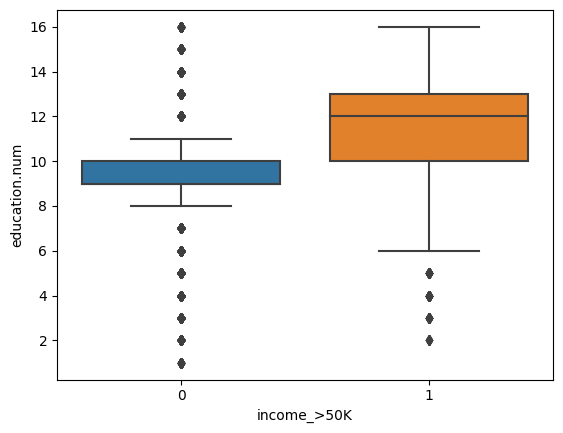

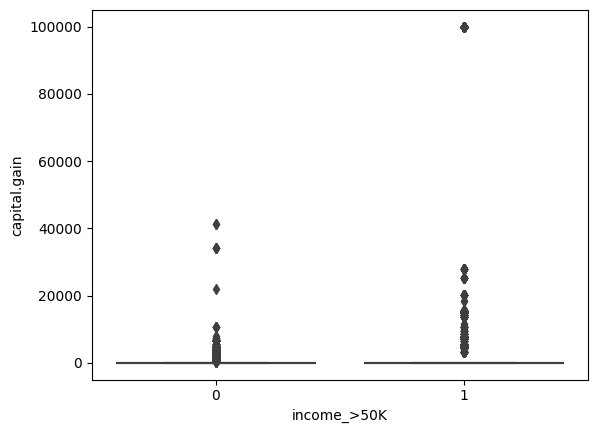

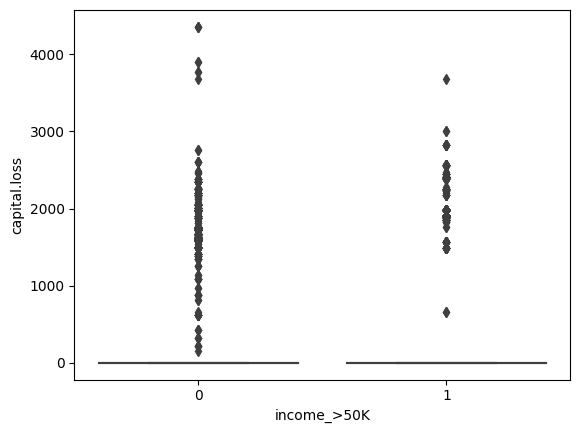

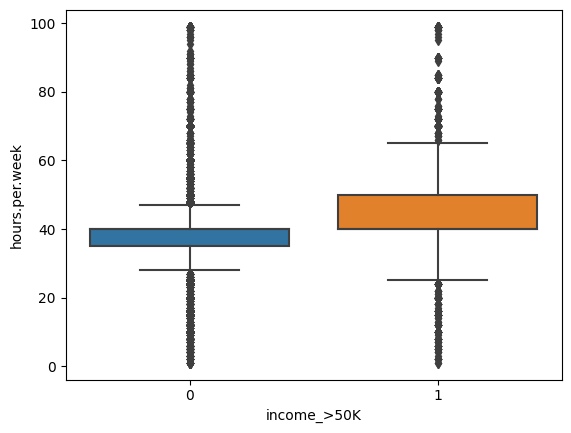

In [19]:
features = dfn.drop("income_>50K", axis=1).columns

# Her bir özellik için ayrı bir subplot içinde kutu grafiği çiz
for i, feature in enumerate(features, 1):
    #plt.subplot(1, len(features), i)
    sns.boxplot(x="income_>50K", y=feature, data=dfn)
    plt.show()
# Grafikleri göster


In [20]:
dfn=pd.DataFrame()

In [21]:
dfn=pd.concat((numeric_columns,df_one_hot),axis=1)

In [22]:
dfn=dfn.select_dtypes(include=[np.number])
dfn

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,age,fnlwgt,education.num,capital.gain,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,90,77053,9,0,4356,40,90,77053,9,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,82,132870,9,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,66,186061,10,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,54,140359,4,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,41,264663,10,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,22,310152,10,0,...,0,0,0,0,0,0,1,0,0,0
32557,27,257302,12,0,0,38,27,257302,12,0,...,0,0,0,0,0,0,1,0,0,0
32558,40,154374,9,0,0,40,40,154374,9,0,...,0,0,0,0,0,0,1,0,0,1
32559,58,151910,9,0,0,40,58,151910,9,0,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression

Train | Test Split and Scaling

In [23]:
X=dfn.drop(["income_>50K"], axis=1)
y=dfn["income_>50K"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)


In [25]:
scaler = StandardScaler()
log_model = LogisticRegression()
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [26]:
y_pred = log_pipe.predict(X_test)
y_pred_proba = log_pipe.predict_proba(X_test)

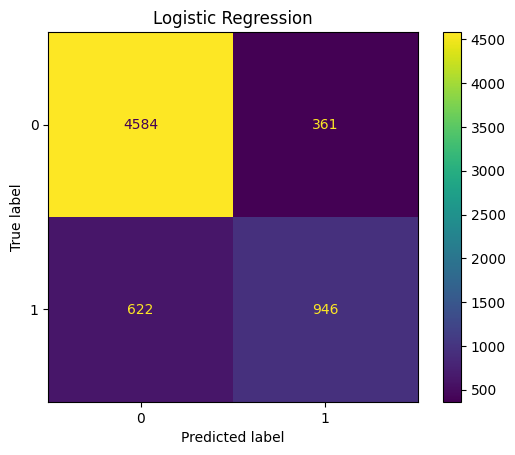

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test);
plt.title("Logistic Regression");

In [28]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [29]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[4584  361]
 [ 622  946]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.72      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513


Train_Set
[[18428  1347]
 [ 2463  3810]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19775
           1       0.74      0.61      0.67      6273

    accuracy                           0.85     26048
   macro avg       0.81      0.77      0.79     26048
weighted avg       0.85      0.85      0.85     26048



In [30]:
from sklearn.model_selection import cross_validate

In [31]:
model = Pipeline([
    ('scaler', StandardScaler()),  # Ölçeklendirme işlemi
    ('classifier', LogisticRegression())  # Lojistik regresyon modeli
])

# Çapraz doğrulama yapma ve ölçümleri hesaplama
scores = cross_validate(model, X_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'], cv=10)

# Hesaplanan ölçümleri bir DataFrame'e dönüştürme
df_scores = pd.DataFrame(scores)

# Ortalamaları alarak sonuçları gösterme
print(df_scores.mean()[['test_precision', 'test_recall', 'test_f1', 'test_accuracy']])


test_precision    0.734362
test_recall       0.602422
test_f1           0.661688
test_accuracy     0.851697
dtype: float64


# gridSearch

In [32]:
from sklearn.model_selection import GridSearchCV

In [42]:
# pipeline for logistic regression

model = Pipeline([("scaler",scaler),("log_model",log_model)])

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# -1 ile 5 arasında 20 tane C değeri elde etmek için
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, düzenlileştirmenin optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 10)

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight= ["balanced", None]
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["liblinear", "sag", "saga"]

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : C,  # hata alan alanlar "log_model__C" : C, yapsınlar
              "log_model__class_weight":class_weight,
              "log_model__solver":solver}

# en iyi modeli elde etmek için
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = 'recall',   # Default olarak 1 sınıfının scorunu max. eder

                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

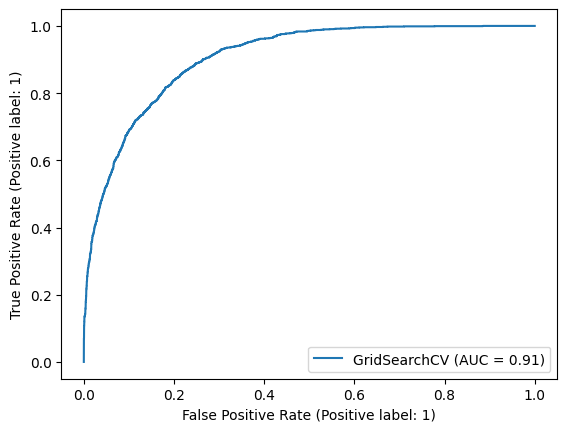

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

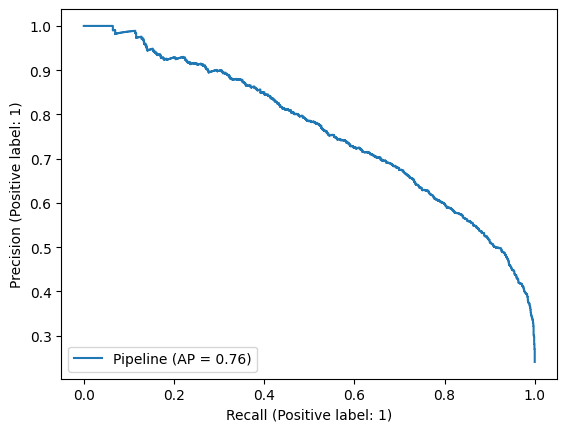

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test)

# K-Nearest Neighbors (KNN) Classification

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
Pipeline(steps=steps)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
pipe_model = Pipeline(steps=steps)

In [ ]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
y_pred = pipe_model.predict(X_test)



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

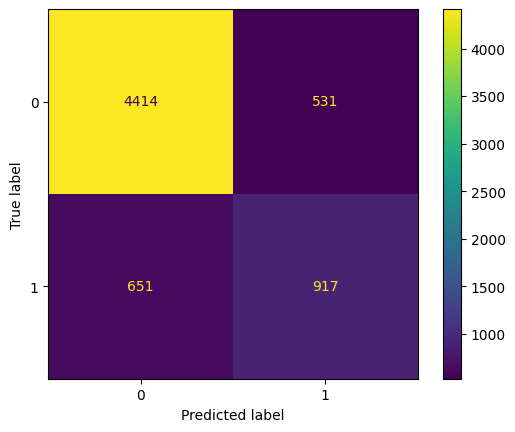

In [ ]:
plot_confusion_matrix(pipe_model, X_test, y_test);

![image.png](attachment:image.png)
logisitc

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4945
           1       0.63      0.58      0.61      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.74      0.75      6513
weighted avg       0.81      0.82      0.82      6513



In [ ]:
param_grid = {'knn__n_neighbors': range(10,20)}
pipe_model = Pipeline(steps=steps)
pipe_grid = GridSearchCV(pipe_model, param_grid, cv = 10, scoring = "recall")


In [ ]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(10, 20)}, scoring='recall')

In [ ]:
pipe_grid.best_params_

{'knn__n_neighbors': 13}

In [ ]:
pipe_grid.best_score_

0.5726137506476092

In [ ]:
steps = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=13))]
model = Pipeline(steps)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision    0.670264
test_recall       0.569426
test_f1           0.615697
test_accuracy     0.828855
dtype: float64

In [ ]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4493  452]
 [ 699  869]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4945
           1       0.66      0.55      0.60      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.74      6513
weighted avg       0.82      0.82      0.82      6513


Train_Set
[[18339  1436]
 [ 2403  3870]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19775
           1       0.73      0.62      0.67      6273

    accuracy                           0.85     26048
   macro avg       0.81      0.77      0.79     26048
weighted avg       0.85      0.85      0.85     26048



# Support Vector Classifier

In [ ]:
steps=[("scaler",StandardScaler()),("SVC",SVC(random_state = 42))]
pip_model=Pipeline(steps=steps)

In [ ]:
pip_model.fit(X_train,y_train)
eval_metric(pip_model, X_train, y_train, X_test, y_test)

Test_Set
[[4634  311]
 [ 677  891]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4945
           1       0.74      0.57      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513


Train_Set
[[18719  1056]
 [ 2476  3797]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     19775
           1       0.78      0.61      0.68      6273

    accuracy                           0.86     26048
   macro avg       0.83      0.78      0.80     26048
weighted avg       0.86      0.86      0.86     26048



In [ ]:
from sklearn.model_selection import cross_validate
steps=[("scaler",StandardScaler()),("SVC",SVC(random_state = 42))]
pip_model=Pipeline(steps=steps)

scores = cross_validate(pip_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.849547
test_precision    0.750171
test_recall       0.562887
test_f1           0.643106
dtype: float64

In [ ]:
param_grid={"SVC__C":[0.001,0.01,.1,10],"SVC__gamma":["scale","auto",.2,.3],"SVC__kernel":["rbf","linear"]}
steps=[("scaler",StandardScaler()),("SVC",SVC(probability=True,class_weight="balanced",random_state = 42))]
pip_model=Pipeline(steps=steps, )
pip_model_grid=GridSearchCV(pip_model,param_grid,scoring="recall",cv=5)


In [ ]:
pip_model_grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
pip_model_grid.best_params_

In [ ]:
pip_model_grid.best_score_

In [ ]:
eval_metric(pip_model_grid, X_train, y_train, X_test, y_test)